In [6]:
%matplotlib inline

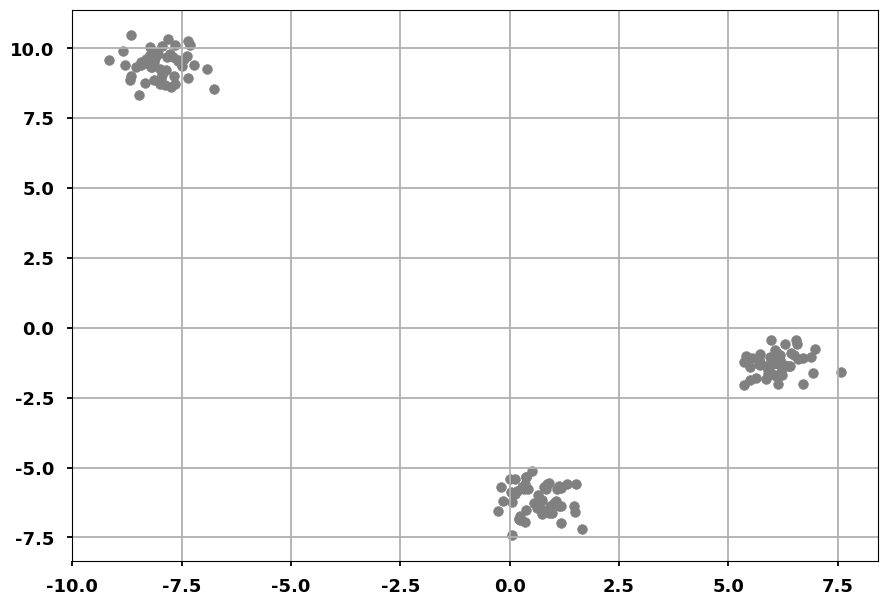

In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets import make_blobs

style.use('seaborn-talk')
krfont={'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True)

plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', s=50)
plt.grid(True)
plt.show()

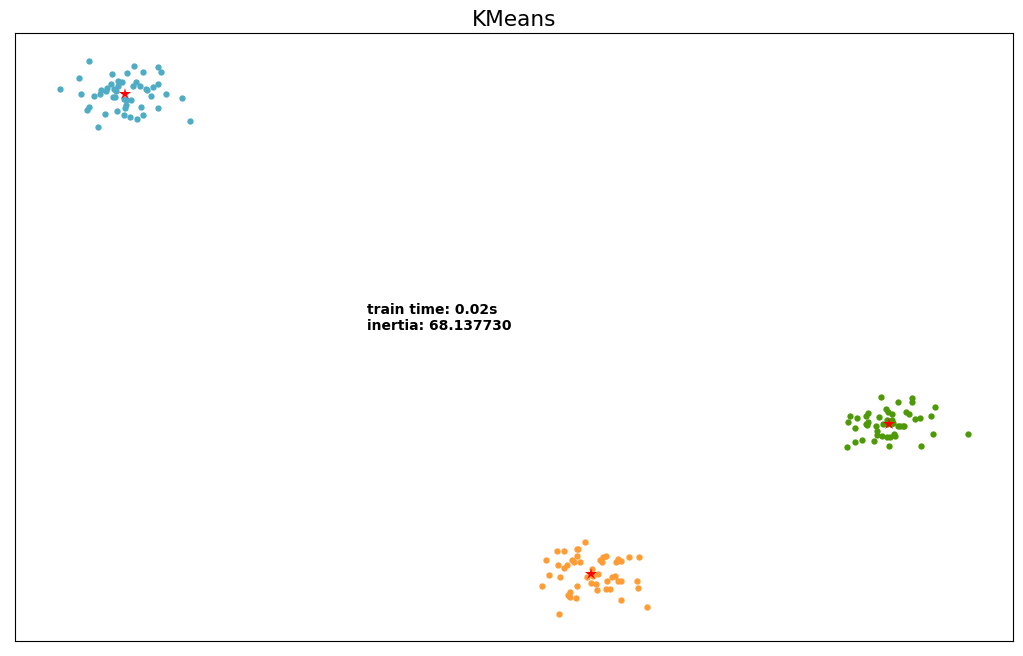

In [28]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
import matplotlib.pyplot as plt

#init='random'
k_means = KMeans(init="k-means++", n_clusters=3)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

fig = plt.figure()#(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

n_clusters = 3
# KMeans
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(cluster_center[0], cluster_center[1], markerfacecolor='red', marker='*')
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

plt.show()